In [12]:
from IPython.core.display import Markdown, display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import traceback
import numpy as np
import random
import scipy.stats as ss
import yaml
import itertools
import sys
import os
import subprocess
from os import path
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

def printmd(*args):
    display(Markdown(' '.join(map(str, args))))
    
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.marker'] = 'o'

fg_color = 'white'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['text.color'] = fg_color
plt.rcParams['ytick.color'] = fg_color
plt.rcParams['xtick.color'] = fg_color
plt.rcParams['axes.labelcolor'] = fg_color
plt.rcParams['axes.edgecolor'] = fg_color

bg_color = "#323a48"
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color
plt.rcParams['legend.facecolor'] = bg_color

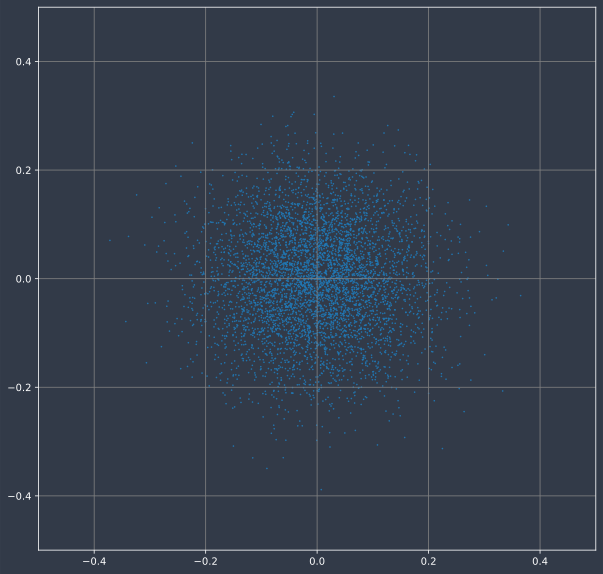

In [25]:
translation_error = 0.1
x = [random.normalvariate(0, translation_error) for _ in range(5000)]
y = [random.normalvariate(0, translation_error) for _ in range(5000)]

plt.scatter(x, y, 0.4)
plt.xlim(-.5, .5)
plt.ylim(-.5, .5)
plt.grid()
plt.show()